<a href="https://colab.research.google.com/github/Vineetttt/MachineLearning-II/blob/main/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Anomaly Detection SOM Experiment

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=a39d6b8654340ba1f2fa162313c52d3cd956e3b0fabe22334f5e3420a1102a11
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Minisom library and module is used for performing Self Organizing Maps
from minisom import MiniSom

In [5]:
# Loading Data
data = pd.read_csv('/content/Credit_Card_Applications.csv')

# X
data

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [7]:
# Shape of the data:
"""
    Write Code to display shape of data
"""
data.shape

(690, 16)

In [8]:
# Info of the data:
"""
    Write Code to display information of data using inbuilt info function
"""
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [10]:
# Defining X variables for the input of SOM
X = data.iloc[:, 1:14].values
y = data.iloc[:, -1].values

# X variables:
"""
    Convert X variable into a pandas DataFrame
"""
X = pd.DataFrame(X)

In [11]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
"""
    apply fit_transform using the created MinMaxScaler sc on variable X
"""
X = sc.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,0.267970,0.375000,0.5,1.000000,0.375,0.228070,1.0,0.0,0.000000,0.0,0.5,0.00
686,1.0,0.104060,0.014821,0.5,0.538462,0.375,0.004386,0.0,0.0,0.000000,0.0,0.5,0.00
687,0.0,0.076391,0.340714,0.5,0.384615,0.375,0.002982,1.0,0.0,0.000000,0.0,0.5,0.05
688,0.0,0.205564,0.517857,0.5,1.000000,0.875,0.108246,1.0,1.0,0.014925,0.0,0.5,0.06


In [12]:
# Set the hyper parameters
som_grid_rows = 10
som_grid_columns = 10
iterations = 20000
sigma = 1
learning_rate = 0.5

# define SOM:
"""
    Create MiniSom Model using above hyperparemeters with
    x = som_grid_rows
    y = som_grid_columns
    sigma = sigma
    input_len = 13
    and learning_rate = learning_rate
"""
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=13, sigma=sigma, learning_rate=learning_rate)

In [13]:
# Initializing the weights
som.random_weights_init(X)

# Training
"""
    Train som model using train_random on varible X for above mentioned iterations
"""
som.train_random(X, iterations)

# Returns the distance map from the weights:
som.distance_map()

array([[0.22924109, 0.33737845, 0.36764252, 0.30155395, 0.31745658,
        0.27881304, 0.39452182, 0.53855387, 0.36586579, 0.12878118],
       [0.42970249, 0.50362238, 0.6349926 , 0.64543809, 0.44193345,
        0.57055626, 0.65436187, 0.56198577, 0.47094079, 0.33163814],
       [0.2936839 , 0.59191945, 0.72451382, 0.59721871, 0.48165525,
        0.63648742, 0.63813132, 0.60028269, 0.51322708, 0.32998452],
       [0.39373541, 0.65284414, 0.98635695, 0.7241326 , 0.76828665,
        0.7929117 , 0.71069484, 0.7093586 , 0.56803459, 0.46548818],
       [0.39221148, 0.68291103, 0.71848571, 1.        , 0.68394239,
        0.72788172, 0.7647435 , 0.71885324, 0.96633806, 0.54934575],
       [0.28955722, 0.42012428, 0.56842145, 0.72857686, 0.62197962,
        0.52749201, 0.63331464, 0.68447539, 0.77560785, 0.35347406],
       [0.34131618, 0.46811573, 0.54061243, 0.70885551, 0.54471617,
        0.74902436, 0.56350233, 0.63354295, 0.52399338, 0.3431848 ],
       [0.46122607, 0.6649021 , 0.7054847

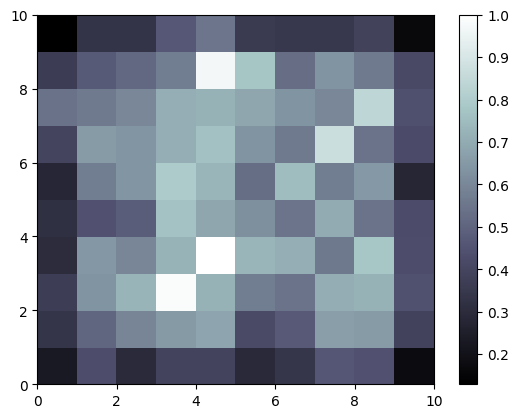

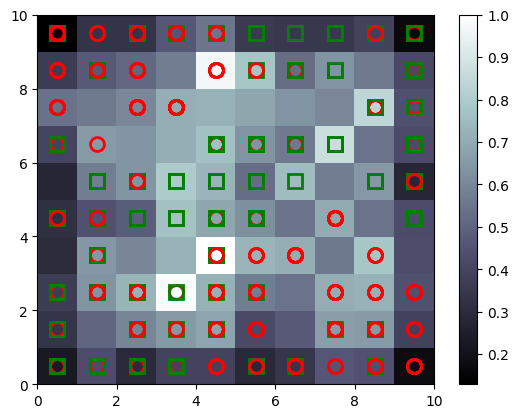

In [14]:
from pylab import plot, axis, show, pcolor, colorbar, bone

bone()
pcolor(som.distance_map().T)       # Distance map as background
colorbar()
show()
bone()
pcolor(som.distance_map().T)
colorbar() #gives legend

markers = ['o', 's']                 # if the observation is fraud then red circular color or else green square
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)

show()

In [17]:
"""
    Write code to store som win_map into a variable names mappings
"""
"""
    Write code to find the length of mapping.keys()
"""
mappings = som.win_map(X)
mappings
mappings.keys()
len(mappings.keys())

78

In [18]:
mappings[(9,8)]
frauds = np.concatenate((mappings[(0,9)], mappings[(8,9)]), axis = 0)
frauds

array([[1.        , 0.05518797, 0.23214286, 0.5       , 0.15384615,
        0.375     , 0.00438596, 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.03      ],
       [1.        , 0.5162406 , 0.21571429, 0.5       , 0.23076923,
        0.375     , 0.00140351, 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.        ],
       [1.        , 0.41233083, 0.04767857, 0.5       , 0.07692308,
        0.375     , 0.00578947, 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.084     ],
       [1.        , 0.08646617, 0.34232143, 0.5       , 0.38461538,
        0.375     , 0.0277193 , 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.04      ],
       [1.        , 0.39353383, 0.17857143, 0.5       , 0.15384615,
        0.5       , 0.00736842, 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.275     ],
       [1.        , 0.43609023, 0.14589286, 0.5       , 0.38461538,
        0.375     , 0.00140

In [19]:
# the list of customers who are frauds:
"""
    Convert he fraud customers back into original values using Standard Scaler(sc) inverse_transform and store into a variable named frauds1
"""
frauds1 = sc.inverse_transform(frauds)
pd.DataFrame(frauds1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,17.42,6.500,2.0,3.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,60.0
1,1.0,48.08,6.040,2.0,4.0,4.0,0.040,0.0,0.0,0.0,0.0,2.0,0.0
2,1.0,41.17,1.335,2.0,2.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,168.0
3,1.0,19.50,9.585,2.0,6.0,4.0,0.790,0.0,0.0,0.0,0.0,2.0,80.0
4,1.0,39.92,5.000,2.0,3.0,5.0,0.210,0.0,0.0,0.0,0.0,2.0,550.0
5,1.0,42.75,4.085,2.0,6.0,4.0,0.040,0.0,0.0,0.0,0.0,2.0,108.0
6,1.0,28.67,14.500,2.0,2.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,0.0
7,1.0,22.25,9.000,2.0,6.0,4.0,0.085,0.0,0.0,0.0,0.0,2.0,0.0
8,1.0,17.92,0.205,2.0,6.0,4.0,0.040,0.0,0.0,0.0,0.0,2.0,280.0
9,1.0,36.17,5.500,2.0,3.0,5.0,5.000,0.0,0.0,0.0,0.0,2.0,210.0
